In [22]:
import sys
import pandas
import matplotlib
import sklearn
import seaborn

print(sys.version)
print(pandas.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
1.2.4
3.4.2
0.24.2
0.11.1


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
# loading dataset
games = pandas.read_csv("games.csv")

In [25]:
# printing names of columns in games
print(games.shape)
print(games.columns)

(81312, 20)
Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


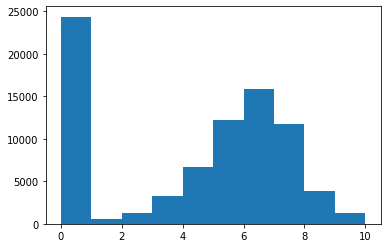

In [26]:
# make histogram of all the ratings in the average_rating column
plt.hist(games["average_rating"])
plt.show()

In [27]:
# Printing the first row of all the games with zero scores

print(games[games["average_rating"]==0].iloc[0])

# Printing the first row of all the games greater than zero scores

print(games[games["average_rating"]>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                  0.0
minplayers                     0.0
maxplayers                     0.0
playingtime                    0.0
minplaytime                    0.0
maxplaytime                    0.0
minage                         0.0
users_rated                      0
average_rating                 0.0
bayes_average_rating           0.0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                 0.0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                      2005.0
minplayers                            2.0
maxplayers                            2.0
playingtime          

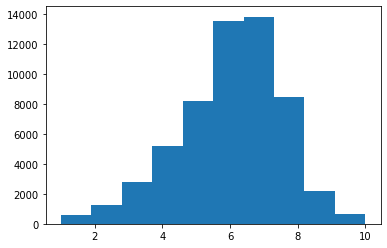

In [28]:
# Remove rows without user reviews

games=games[games["users_rated"]>0]

# Remove the rows with missing values

games=games.dropna(axis=0)

# Making histogram off all average rating
plt.hist(games["average_rating"])
plt.show()

In [29]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


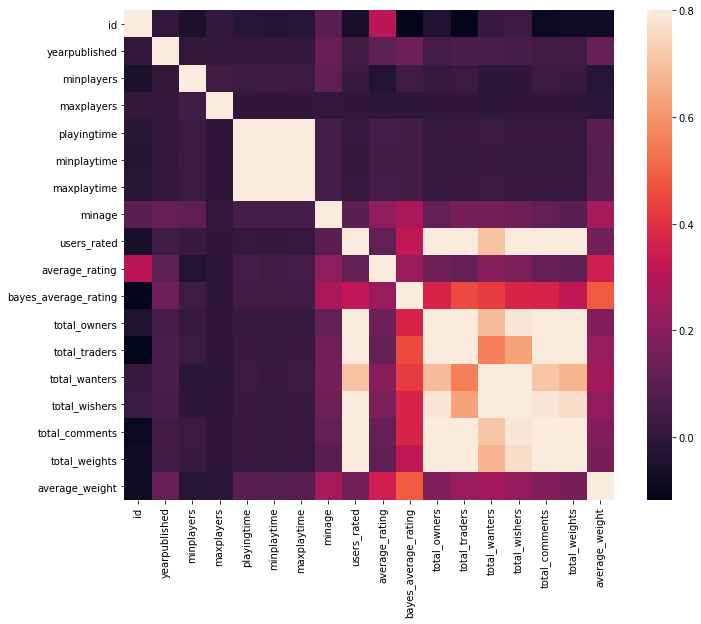

In [31]:
# Correlation matrix
corrmat=games.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

In [59]:
# Get all columns from dataframe
columns= games.columns.tolist()

# Filter the columns to remove data we dont want
columns= [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "id", "name"]]

# Store the variable we will be predicting on
target= "average_rating"

In [60]:
# Import a convenience function to split the sets.
from sklearn.model_selection import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train = games.sample(frac=0.8, random_state=1)

# Select anything not in the training set and put it in the testing set.
test = games.loc[~games.index.isin(train.index)]

# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [61]:
# import linear regression model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# initialise the model class
LR=LinearRegression()

# Fit the model to the training data
LR.fit(train[columns], train[target])

LinearRegression()

In [62]:
# generate the prictions for the test set
predictions = LR.predict(test[columns])

# compute error between test predictions and actual values
mean_squared_error(predictions, test[target])

2.0787752049695

In [64]:
# import the random forest model
from sklearn.ensemble import RandomForestRegressor

# initialise the model
RFR=RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

# fit to data
RFR.fit(train[columns], train[target])


RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [66]:
# make prediction
predictions = RFR.predict(test[columns])

# compute the error between our test predictions and actual values
mean_squared_error(predictions, test[target])

1.4458625791207198

In [67]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [69]:
# make predictions with both models
LRrating = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
RFRrating = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

# print the predictions
print(LRrating)
print(RFRrating)

[8.12022051]
[7.91373581]


In [71]:
# original rating
test[target].iloc[0]

8.07933